#TIME SERIES ANALYSIS

## Jianhao Zhou

##Goal: Find outliers, trends and periodicity in the MTA turnstile data
    

##DATA:
MTA subway fares. It is a complete dataset of
rides logged by card swipes for 600 Manhattan stations.

The data was organized  by Sina Kashuk at CUSP. You can get it in the github repo as well as here: http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/MTA_Fare.npy. 

It contains 23 different subway card types 
(e.g. monthly pass, daily pass, Act for Disability pass…) as follows:


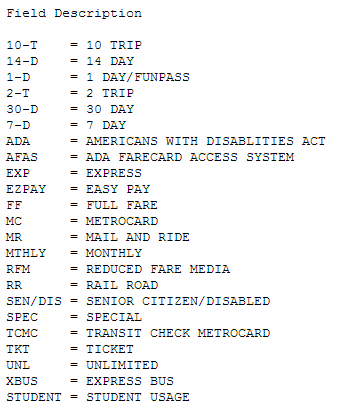

In [2]:
from IPython.display import Image
Image(filename = "Ridetypes.png")

#Task 1: 
Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
Identify it and figure out what it is due to.


#Task 2: 
Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the **ridership types**  that have steadily increased in popularity,  and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)


#Task 3:
Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)


#EXTRA CREDIT: Cluster. 
Cluster the time series, i.e. identify groups of time series that look similar among each other. You can use KMeans for example to identify common trends, or PCA (Principle Component Analysis). 
Since this is extra credit I will leave it to you to figure out the details, but for KMeans for e.g. if you use the sklearn.cluster package it would look something like:

i am flattening the first 2 dimensions of the cube to cluster all light curves for all stations and all types

tots = data.transpose(2,0,1).reshape(data.shape[2], data.shape[1]*data.shape[0]).T

removing empty light curves
tots = tots[tots.std(1)>0]

with Kmeans you have to choose the number of clusters ahead km = 

KMeans(n_clusters=10)

and standardize the lightcurves before clustering
vals = ((tots.T - tots.mean(1))/tots.std(1)).T

then you can run:

km.fit(vals)

In [1]:
import pylab as pl
import numpy as np
import pandas as pd
import json
import os
import matplotlib.gridspec as gridspec

s = json.load(open(os.getenv('PUI2015')+'/fbb_matplotlibrc.json') )
pl.rcParams.update(s)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/JianhaoZhou/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
#reading the datacube
mta = np.load("MTA_Fare.npy").astype(float)
mta.shape

(600, 23, 194)

ride types list

In [3]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp','ez',
            'ff','mc','mr','month','rfm','rr','sen','spec','tcmc','t',
            'umlim','xbus','stud'])

In [4]:
#creating dates of 194 weeks
week = pd.date_range('05/21/2010', periods=194, freq='W')

In [11]:
#replace the missing values -1 with nan
mta[mta==-1] = np.nan

#sum all 600 stations
mta_allsum1 = np.nansum(mta, axis=0)
mta_allsum1 = pd.DataFrame(mta_allsum1)
mta_allsum2 = np.nansum(mta, axis=1)
mta_allsum2 = pd.DataFrame(mta_allsum2)
print (mta_allsum1.shape)
print (mta_allsum2.shape)

(23, 194)
(600, 194)


#Task 1: 
Event detection: Identify the most prominent event. There is a very significant drop (>3-sigma) in all time series.
Identify it and figure out what it is due to.

(array([ 734016.,  734138.,  734258.,  734381.,  734503.,  734624.,
         734747.,  734869.,  734989.,  735112.,  735234.]),
 <a list of 11 Text xticklabel objects>)

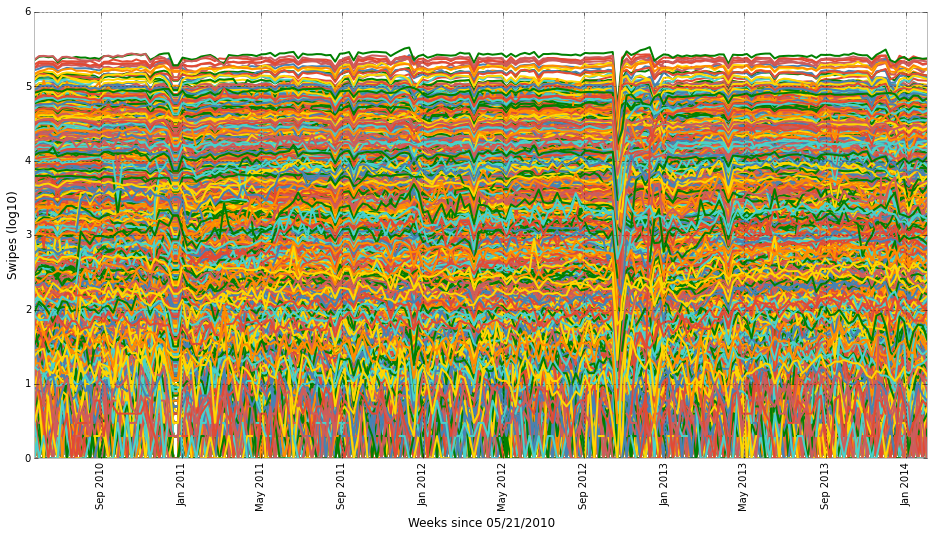

In [6]:
#Plot the swipes(log10)

fig = figure(figsize=(16, 8), dpi=100)

for i in range(mta.shape[0]):
    for j in range(mta.shape[1]):
        ax = pl.plot(week, np.log10(mta[i,j]))

pl.xlabel('Weeks since 05/21/2010')
pl.ylabel('Swipes (log10)')
pl.xticks(rotation = 90)

In [7]:
# defining thresholds and searching for significant events

sigevents = pd.Series()
for i in range(len(mta_allsum1)):
    thresholds = [mta_allsum1.loc[i,:].mean() + 3*mta_allsum1.loc[i,:].std(), 
                  mta_allsum1.loc[i,:].mean() - 3*mta_allsum1.loc[i,:].std()]
    sigevent = (mta_allsum1.loc[i,:]<thresholds[1])
    sigevents = pd.concat([sigevents, pd.Series(week[sigevent.index[sigevent==True]])], axis=0, ignore_index=True)
    sigevents.sort()
    
print sigevents

0    2010-12-19
1    2010-12-26
2    2012-03-18
14   2012-10-21
13   2012-10-21
12   2012-10-21
11   2012-10-21
10   2012-10-21
9    2012-10-21
7    2012-10-21
6    2012-10-21
5    2012-10-21
4    2012-10-21
3    2012-10-21
8    2012-10-21
15   2012-12-16
16   2013-09-15
17   2013-09-15
18   2014-01-05
19   2014-01-05
dtype: datetime64[ns]


/Users/JianhaoZhou/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting


##A very significant drop in all time series is the week of 2012-10-21, which is caused by Hurricane Sandy.

#Task 2:
Some of the time series are stationary, some have a complex structure, some show a downward trend: Identify the ridership types that have steadily increased in popularity, and that have steadily decreased. by how much? (e.g what is the ratio of usage in the first 10 and last 10 weeks)

Ridetype: 10t, Std: 546777.616992, Ratio: 0.978667087302
Ridetype: 14d, Std: 64593.9013999, Ratio: 0.79868054602
Ridetype: 1d, Std: 5767.41249418, Ratio: 0.899810476622
Ridetype: 2t, Std: 8828.00385607, Ratio: 1.07088927164
Ridetype: 30d, Std: 3624.08852559, Ratio: 0.967317176485
Ridetype: 7d, Std: 631955.017784, Ratio: 0.719555117345
Ridetype: ada, Std: 473487.373171, Ratio: 1.11130702032
Ridetype: afas, Std: 3794.92677395, Ratio: 4774.47826087
Ridetype: exp, Std: 101444.891854, Ratio: 93571.3428571
Ridetype: ez, Std: 206370.776156, Ratio: 665798.555556
Ridetype: ff, Std: 18800.9465287, Ratio: 1.22129628533
Ridetype: mc, Std: 25371.3235538, Ratio: 0.824035088267
Ridetype: mr, Std: 61154.07344, Ratio: 4.03470963308e-05
Ridetype: month, Std: 17282.8338522, Ratio: 1.72794422105
Ridetype: rfm, Std: 153165.983867, Ratio: 1.53938888675
Ridetype: rr, Std: 33309.1353549, Ratio: 0.385659649203
Ridetype: sen, Std: 18139.76186, Ratio: 0.343713862169
Ridetype: spec, Std: 10350.7975728, Ratio: 0.0

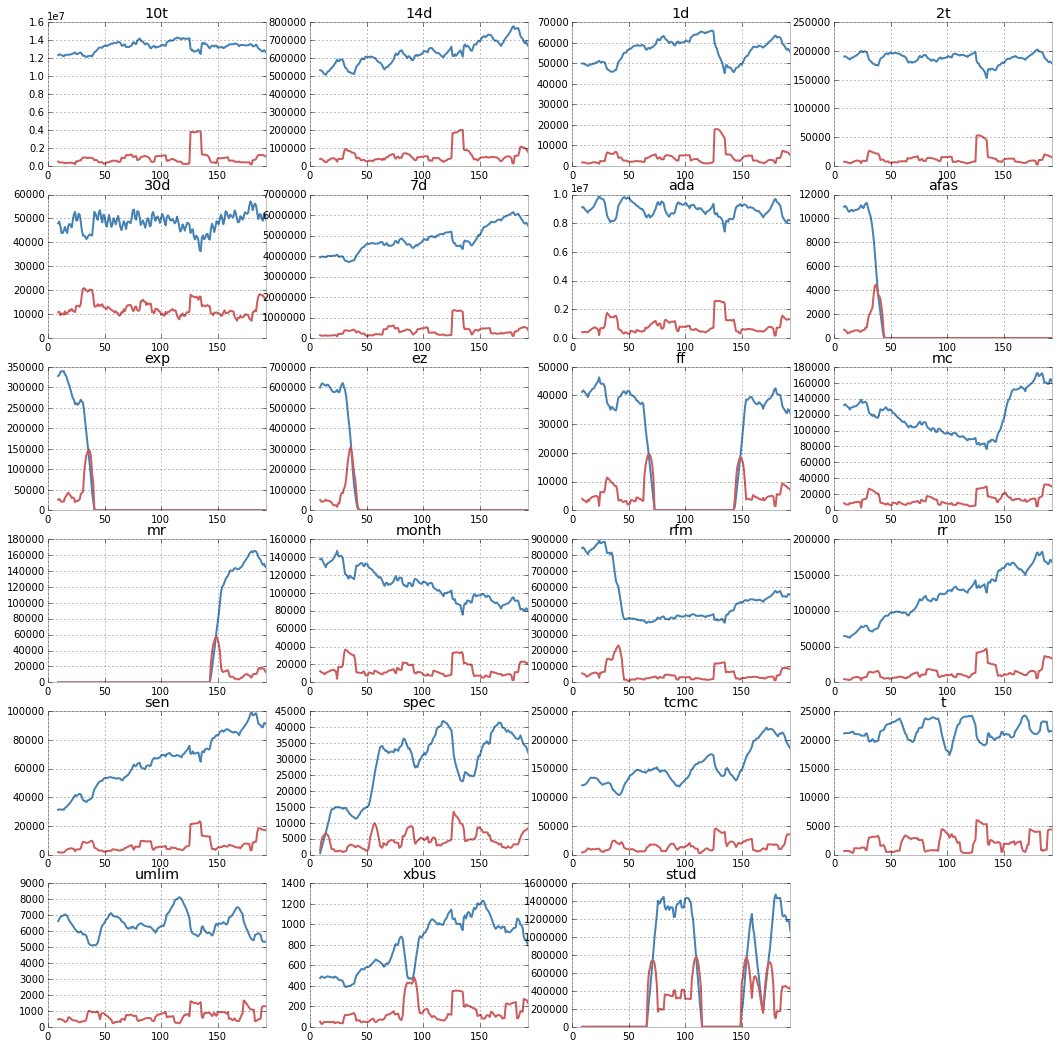

In [8]:

fig = plt.figure(figsize=(18,18))
ratio = np.zeros(23)
std = np.zeros(23)
for i in range(6):
    for j in range(4):
        if i*j<15:
            rolling_mean = pd.rolling_mean(mta_allsum1.loc[i*4+j,:], 10)
            ratio[i*4+j] = rolling_mean.loc[9]/rolling_mean.loc[193]
            std[i*4+j] = np.nanstd(rolling_mean)
            ax = fig.add_subplot(6,4,i*4+j+1)
            ax = rolling_mean.plot()
            ax.set_title(ridetype[i*4+j])
            ax = pd.rolling_std(mta_allsum1.loc[i*4+j,:], 10).plot()
            print 'Ridetype: %s, Std: %s, Ratio: %s' % (ridetype[i*4+j], std[i*4+j], ratio[i*4+j]) 

##The ridership types of "14 Day" "7 Day" "Rail Road" "Senior Citizen/Disabled" have steadily increased in popularity, and the ridership type of  "Monthly" has steadily decreased. 

#Task 3:
Several stations show a prominent annual periodicity. Identify the 4 **stations** (indentify them by the index of their location in the data cube) that show the most prominent periodic trend on an annual period (52 weeks). (Can you figure out what the periodic peak in rides is due to?)



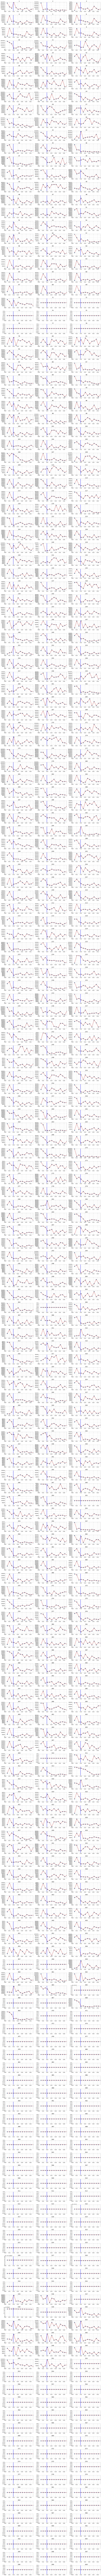

In [19]:
#Using Fourier Transformation to find periodicity
f = np.abs(np.fft.rfft(mta_allsum2))

#Plotting periodicity for 600 stations
fig = plt.figure(figsize=(18,420))

for i in range(600):
    ax = fig.add_subplot(200,3,i+1)
    f = np.abs(np.fft.rfft(mta_allsum2.loc[i,:]))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], 'o', ms = 8)
    ax.set_title("%i" %(i+1))
    ax.plot(np.fft.rfftfreq(194, 1.0)[1:], (f)[1:], '-')
    ax.set_xlim(0,1.0/15)
    plt.axvline(1.0/52)
    pl.subplots_adjust(hspace=.5, top=1, bottom=.1)

##The stations 1, 151, 195 and 328  show the most prominent periodic trends on the anuual period.